In [47]:
import os
import pandas as pd

path = "/Users/arbaaz/Downloads/break/ds"
os.listdir(path)

['y_train.parquet',
 'X_train.parquet',
 '.gitignore',
 'X_test.reduced.parquet',
 'y_test.reduced.parquet']

In [48]:
X_train_path = path+"/X_train.parquet"
df_x = pd.read_parquet(X_train_path)
df_x.head()

value  period
id time                  
0  0    -0.005564       0
   1     0.003705       0
   2     0.013164       0
   3     0.007151       0
   4    -0.009979       0

In [6]:
df_x.describe()

,value,period
count,2.371573e+07,2.371573e+07
mean,5.728306e-04,2.633960e-01
std,9.528225e-02,4.404754e-01
min,-2.284821e+00,0.000000e+00
25%,-4.524159e-03,0.000000e+00
50%,8.761704e-05,0.000000e+00
75%,4.992070e-03,1.000000e+00
max,4.125000e+02,1.000000e+00


In [7]:
df_x.groupby("id").size().describe()

count    10001.000000
mean      2371.336266
std        482.645935
min       1258.000000
25%       1991.000000
50%       2369.000000
75%       2743.000000
max       3478.000000
dtype: float64

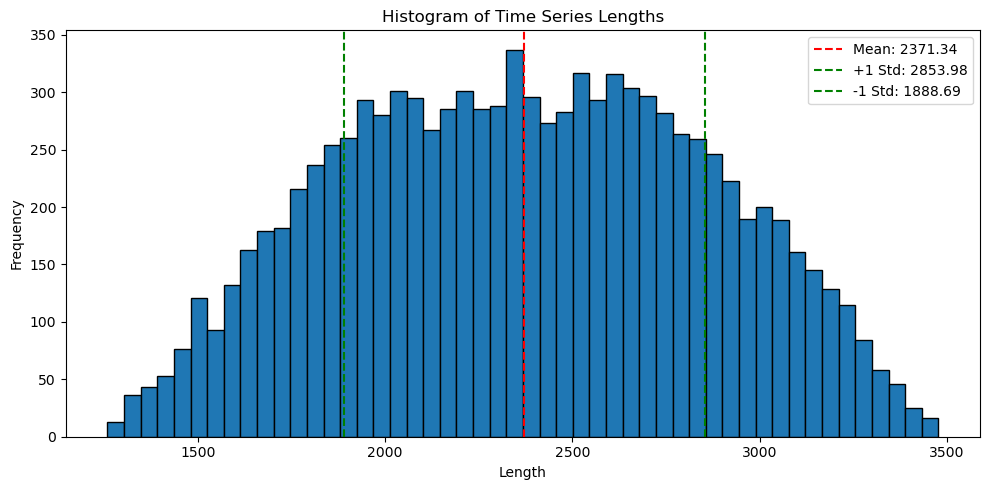

In [8]:
import matplotlib.pyplot as plt

def plot_length_histogram(X, bins=50):
    lengths = X.groupby('id').size()
    mean = lengths.mean()
    std = lengths.std()

    plt.figure(figsize=(10, 5))
    plt.hist(lengths, bins=bins, edgecolor='black')
    plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(mean + std, color='g', linestyle='--', label=f'+1 Std: {mean + std:.2f}')
    plt.axvline(mean - std, color='g', linestyle='--', label=f'-1 Std: {mean - std:.2f}')
    plt.title("Histogram of Time Series Lengths")
    plt.xlabel("Length")
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_length_histogram(df_x)

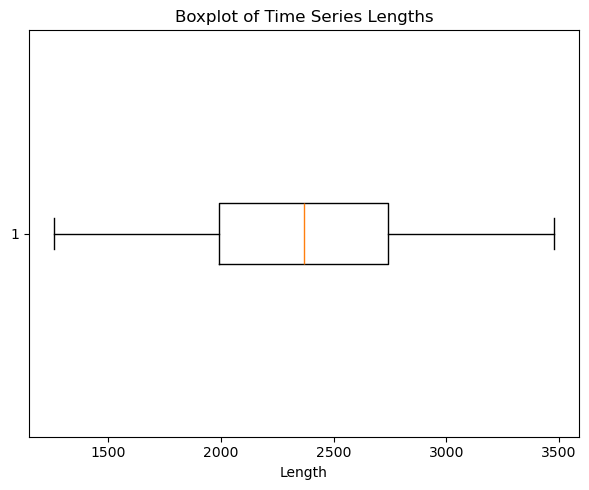

In [9]:
def plot_length_boxplot(X):
    lengths = X.groupby('id').size()

    plt.figure(figsize=(6, 5))
    plt.boxplot(lengths, vert=False)
    plt.title("Boxplot of Time Series Lengths")
    plt.xlabel("Length")
    plt.tight_layout()
    plt.show()

plot_length_boxplot(df_x)

In [ ]:
# GLOBAL PERIODS COUNT
df_x['period'].value_counts().sort_index() / 1e6

period
0    17.469105
1     6.246629
Name: count, dtype: float64

In [ ]:
# SERIES WISE PERIODS COUNT
periods_summary = df_x.groupby('id')['period'].value_counts().unstack(fill_value=0)
periods_summary

period,0,1
id,,
0,1351,294
1,2247,282
2,2333,515
3,2271,629
4,1657,456
...,...,...
9996,2160,554
9997,1780,363
9998,2483,907


In [ ]:
def period_stats_summary(per_series_counts):
    stats_0 = per_series_counts[0].describe()
    stats_1 = per_series_counts[1].describe()

    summary = pd.DataFrame({
        'Period 0': stats_0,
        'Period 1': stats_1
    })

    return summary


period_stats_summary(periods_summary)    # SERIES WISE STATS OF PERIODS 

,Period 0,Period 1
count,10001.000000,10001.00000
mean,1746.735826,624.60044
std,432.507524,215.98523
min,1000.000000,250.00000
25%,1368.000000,435.00000
50%,1749.000000,629.00000
75%,2119.000000,810.00000
max,2499.000000,999.00000


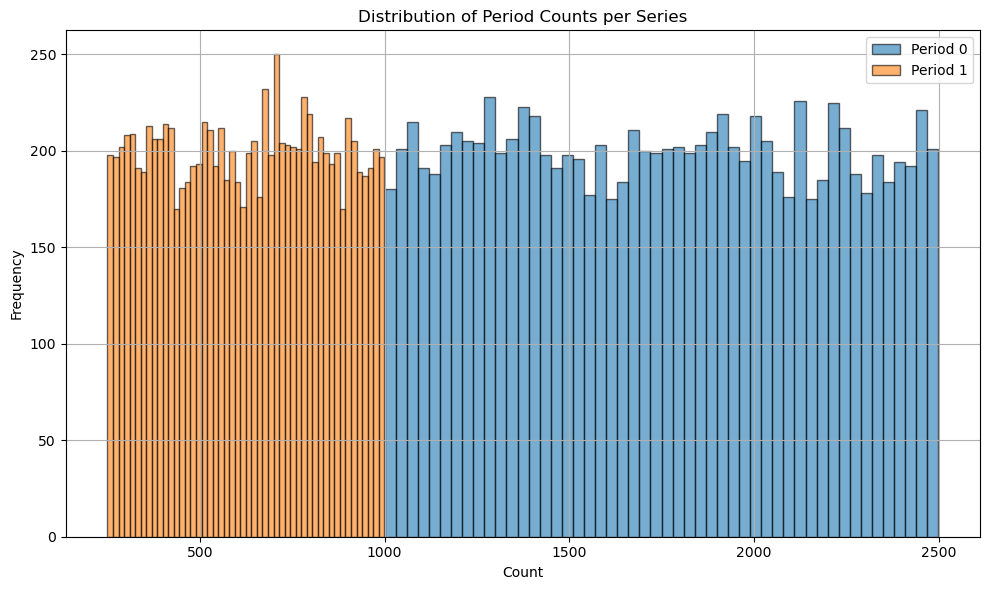

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_period_count_distribution(period_counts_df, plot_type="kde"):
    """
    Plots overlapping density or histogram plots for period 0 and period 1 counts.

    Args:
        period_counts_df (pd.DataFrame): DataFrame with columns [0, 1] or ['Period 0', 'Period 1']
                                          representing counts per series.
        plot_type (str): "kde" for density plot, "hist" for histogram.
    """
    # Rename columns if needed
    if 0 in period_counts_df.columns:
        period_counts_df = period_counts_df.rename(columns={0: 'Period 0', 1: 'Period 1'})
    
    plt.figure(figsize=(10, 6))

    if plot_type == "kde":
        sns.kdeplot(period_counts_df['Period 0'], fill=True, label='Period 0', linewidth=2)
        sns.kdeplot(period_counts_df['Period 1'], fill=True, label='Period 1', linewidth=2)
    elif plot_type == "hist":
        plt.hist(period_counts_df['Period 0'], bins=50, alpha=0.6, label='Period 0', edgecolor='black')
        plt.hist(period_counts_df['Period 1'], bins=50, alpha=0.6, label='Period 1', edgecolor='black')
    else:
        raise ValueError("plot_type must be either 'kde' or 'hist'")

    plt.title("Distribution of Period Counts per Series")
    plt.xlabel("Count")
    plt.ylabel("Density" if plot_type == "kde" else "Frequency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_period_count_distribution(periods_summary, "hist")

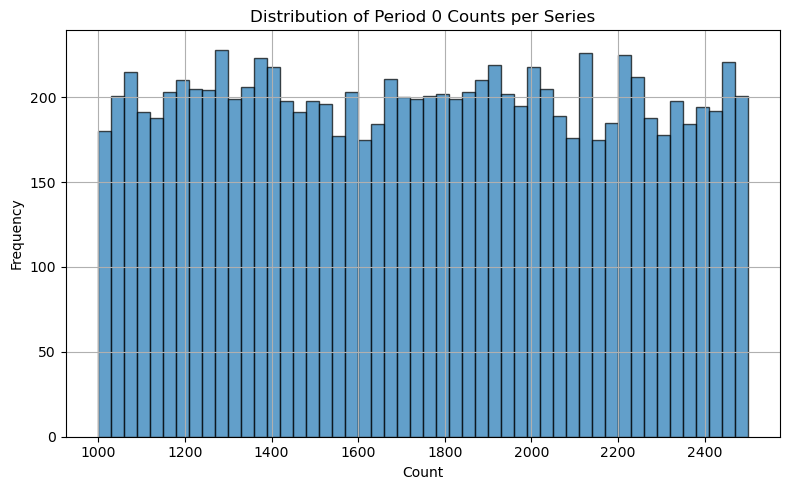

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_single_period_distribution(period_counts_df, period=0, plot_type="kde"):
    """
    Plots a density or histogram plot for a single period's count distribution.

    Args:
        period_counts_df (pd.DataFrame): DataFrame with columns [0, 1] or ['Period 0', 'Period 1'].
        period (int): 0 or 1, which period to plot.
        plot_type (str): "kde" for density plot, "hist" for histogram.
    """
    # Rename for consistency
    if 0 in period_counts_df.columns:
        period_counts_df = period_counts_df.rename(columns={0: 'Period 0', 1: 'Period 1'})
    
    period_col = f"Period {period}"

    plt.figure(figsize=(8, 5))

    if plot_type == "kde":
        sns.kdeplot(period_counts_df[period_col], fill=True, label=period_col, linewidth=2)
        plt.ylabel("Density")
    elif plot_type == "hist":
        plt.hist(period_counts_df[period_col], bins=50, alpha=0.7, edgecolor='black')
        plt.ylabel("Frequency")
    else:
        raise ValueError("plot_type must be either 'kde' or 'hist'")

    plt.title(f"Distribution of {period_col} Counts per Series")
    plt.xlabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_single_period_distribution(periods_summary, period=0, plot_type="hist")

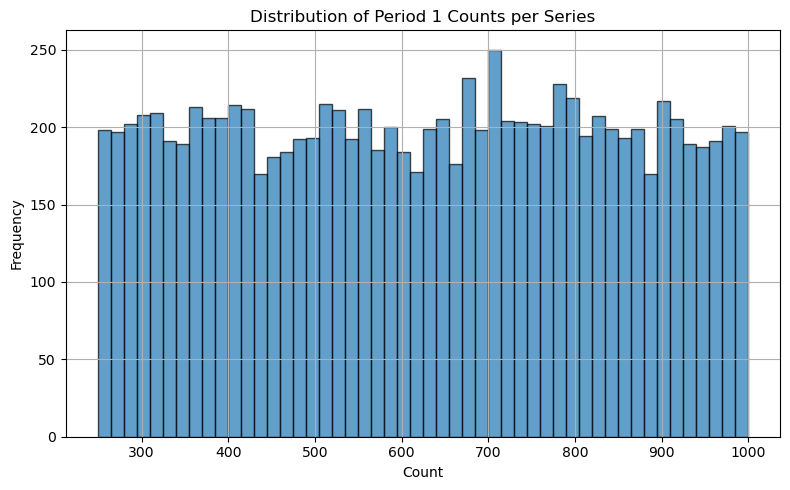

In [33]:
plot_single_period_distribution(periods_summary, period=1, plot_type="hist")

In [ ]:
# PERIODS BY TIME STEPS GLOBAL
df_x.groupby('time')['period'].value_counts() 

time  period
0     0         10001
1     0         10001
2     0         10001
3     0         10001
4     0         10001
                ...  
3473  1             2
3474  1             1
3475  1             1
3476  1             1
3477  1             1
Name: count, Length: 4977, dtype: int64

In [26]:
def summarize_period_time_distribution(df):
    # Group and count
    grouped = df.groupby('time')['period'].value_counts().unstack(fill_value=0)

    # Rename columns for clarity
    grouped.columns = ['period_0_count', 'period_1_count']

    # Basic stats for each period
    summary = {
        'Period 0': grouped['period_0_count'].describe(),
        'Period 1': grouped['period_1_count'].describe()
    }

    return pd.DataFrame(summary)


summarize_period_time_distribution(df_x)

,Period 0,Period 1
count,3478.000000,3478.000000
mean,5022.744393,1796.040541
std,4222.463397,1716.831193
min,0.000000,0.000000
25%,0.000000,0.000000
50%,5053.500000,1361.000000
75%,10001.000000,3755.250000
max,10001.000000,4223.000000


Per-time-step counts describe():
 period             0            1
count    3478.000000  3478.000000
mean     5022.744393  1796.040541
std      4222.463397  1716.831193
min         0.000000     0.000000
25%         0.000000     0.000000
50%      5053.500000  1361.000000
75%     10001.000000  3755.250000
max     10001.000000  4223.000000


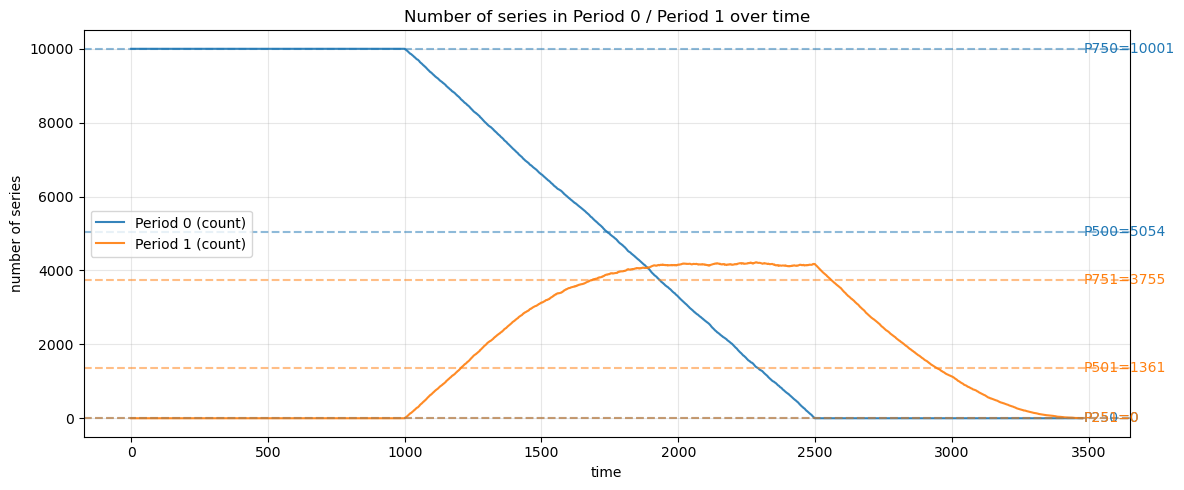

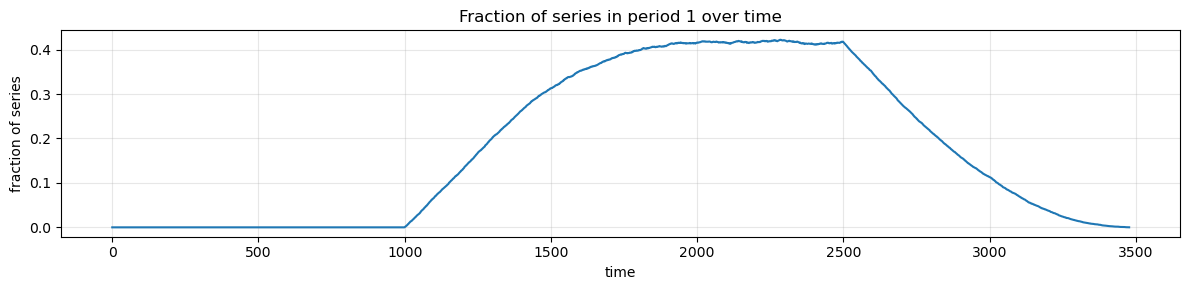

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_period_counts_over_time(X, show_percentiles=[0.25, 0.5, 0.75]):
    """
    Compute counts of period 0 and period 1 per time step and plot:
      - lines of counts over time
      - shaded region or percentile markers

    Args:
        X (pd.DataFrame): MultiIndex (id, time) with column 'period' (values 0 or 1)
        show_percentiles (list): percentiles to compute and annotate (fractions)
    """
    # Count how many ids are in period 0 and 1 at each time step
    counts = X.groupby(['time'])['period'].value_counts().unstack(fill_value=0)
    # Ensure both columns exist
    if 0 not in counts.columns:
        counts[0] = 0
    if 1 not in counts.columns:
        counts[1] = 0
    counts = counts.sort_index()

    # Basic descriptive table for the counts (per-time-step)
    stats = counts.describe()
    print("Per-time-step counts describe():\n", stats.loc[['count','mean','std','min','25%','50%','75%','max']])

    # Plot counts over time
    plt.figure(figsize=(12,5))
    plt.plot(counts.index, counts[0], label='Period 0 (count)', alpha=0.9)
    plt.plot(counts.index, counts[1], label='Period 1 (count)', alpha=0.9)
    plt.xlabel("time")
    plt.ylabel("number of series")
    plt.title("Number of series in Period 0 / Period 1 over time")
    plt.legend()
    plt.grid(alpha=0.3)

    # Mark percentiles (computed across time steps)
    for p in show_percentiles:
        q0 = np.percentile(counts[0].values, 100*p)
        q1 = np.percentile(counts[1].values, 100*p)
        plt.axhline(q0, color='C0', linestyle='--', alpha=0.5)
        plt.axhline(q1, color='C1', linestyle='--', alpha=0.5)
        plt.text(counts.index[-1]+5, q0, f'P{int(p*100)}0={q0:.0f}', color='C0', va='center')
        plt.text(counts.index[-1]+5, q1, f'P{int(p*100)}1={q1:.0f}', color='C1', va='center')

    plt.tight_layout()
    plt.show()

    # Optional: show percent of series in period1 over time
    total_series = X.index.get_level_values('id').nunique()
    pct1 = counts[1] / total_series
    plt.figure(figsize=(12,3))
    plt.plot(counts.index, pct1, label='% series in period 1')
    plt.xlabel("time")
    plt.ylabel("fraction of series")
    plt.title("Fraction of series in period 1 over time")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_period_counts_over_time(df_x)


In [44]:
df_x = df_x.reset_index()
df_x

,id,time,value,period
0,0,0,-0.005564,0
1,0,1,0.003705,0
2,0,2,0.013164,0
3,0,3,0.007151,0
4,0,4,-0.009979,0
...,...,...,...,...
23715729,10000,2134,0.001137,1
23715730,10000,2135,0.003526,1
23715731,10000,2136,0.000687,1
23715732,10000,2137,0.001640,1


In [45]:
df_x.groupby(['id', 'period'])['time'].count().unstack(fill_value=0)

period,0,1
id,,
0,1351,294
1,2247,282
2,2333,515
3,2271,629
4,1657,456
...,...,...
9996,2160,554
9997,1780,363
9998,2483,907


In [ ]:
# How much time does series spends in period 1 
def summarize_periods_per_series(df):
    # Reset to columns for easier manipulation
    df_reset = df.reset_index()

    # Count how many time steps are in each period for each ID
    period_counts = df_reset.groupby(['id', 'period'])['time'].count().unstack(fill_value=0)

    # Rename columns
    period_counts.columns = ['period_0_count', 'period_1_count']

    # Add total length and ratio (optional)
    period_counts['total'] = period_counts.sum(axis=1)
    period_counts['ratio_p1'] = period_counts['period_1_count'] / period_counts['total']

    return period_counts

df = summarize_periods_per_series(df_x)
df

,period_0_count,period_1_count,total,ratio_p1
id,,,,
0,1351,294,1645,0.178723
1,2247,282,2529,0.111507
2,2333,515,2848,0.180829
3,2271,629,2900,0.216897
4,1657,456,2113,0.215807
...,...,...,...,...
9996,2160,554,2714,0.204127
9997,1780,363,2143,0.169389
9998,2483,907,3390,0.267552


In [53]:
df["ratio_p1"].describe()

count    10001.000000
mean         0.266091
std          0.085668
min          0.094389
25%          0.199557
50%          0.264226
75%          0.325597
max          0.493709
Name: ratio_p1, dtype: float64